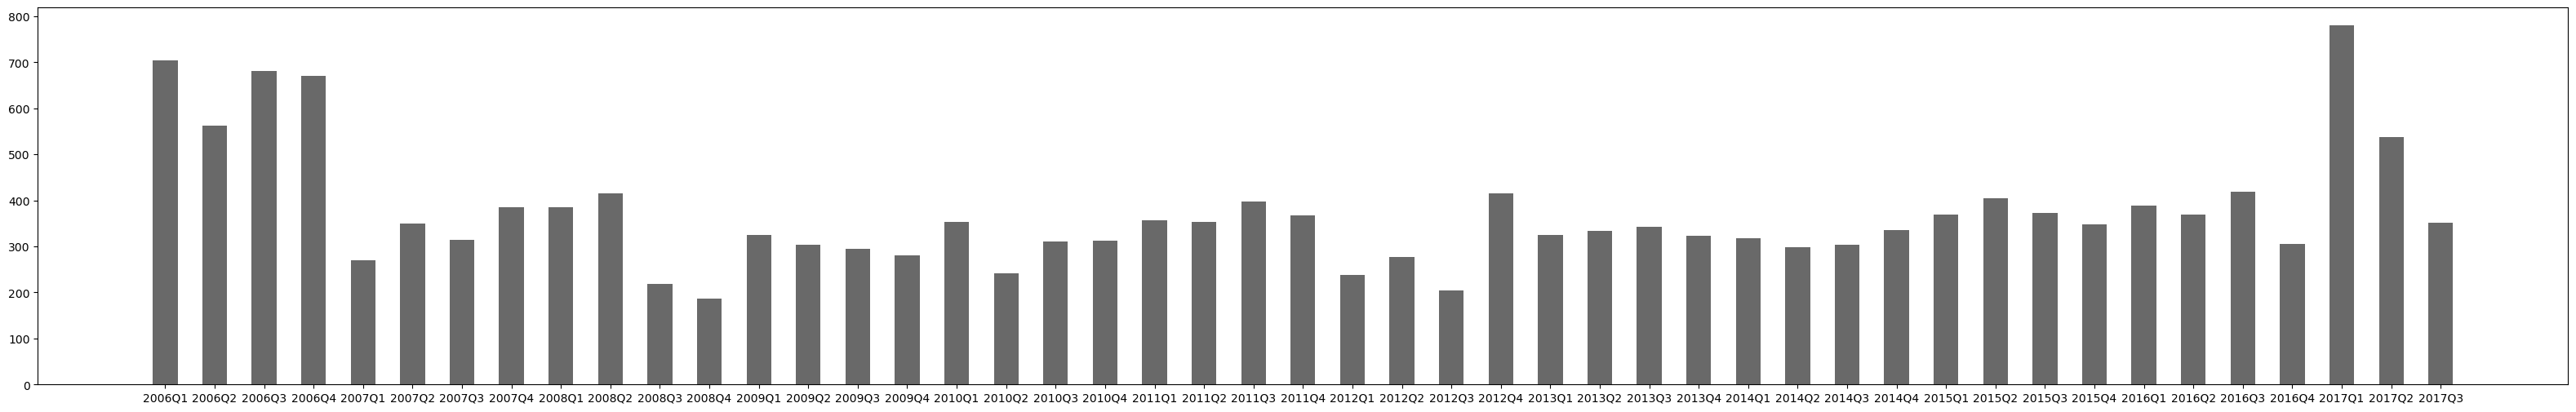

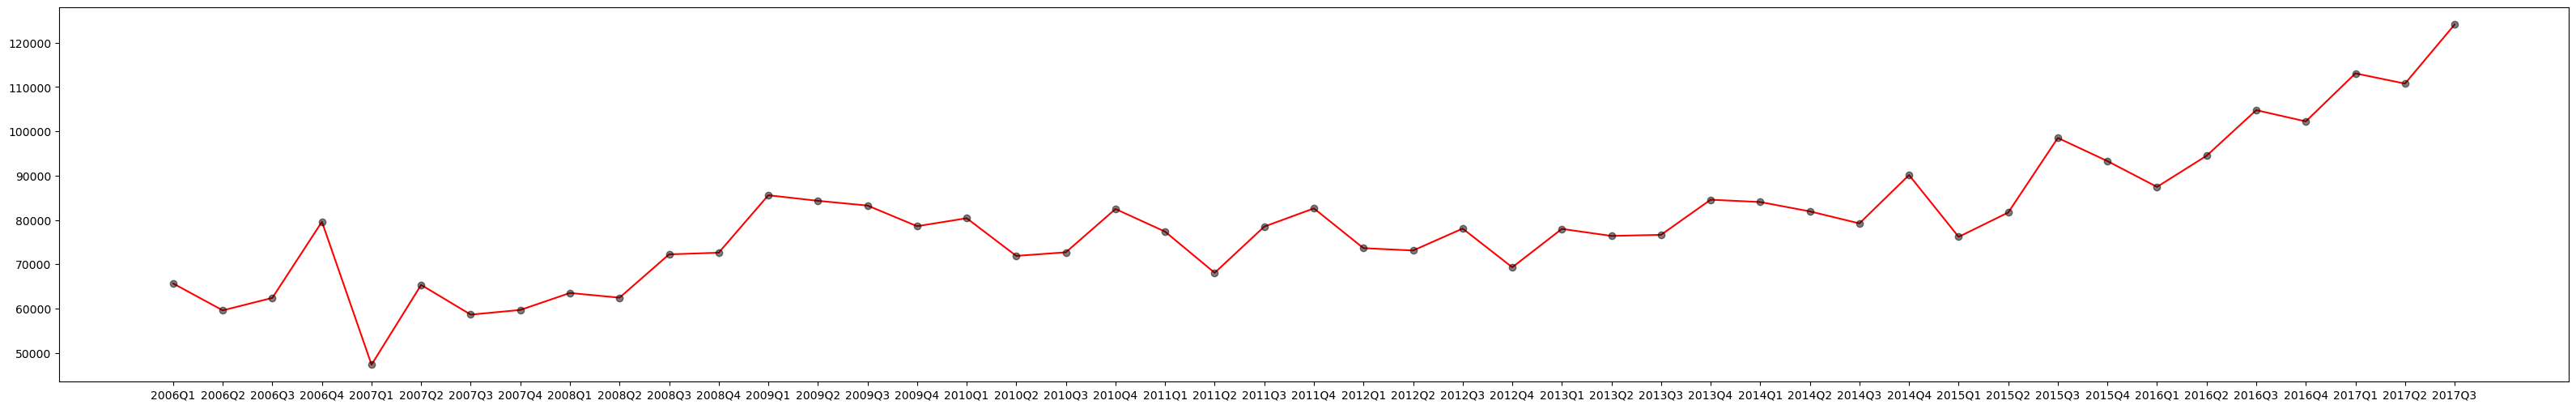

In [1]:
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

#엑셀 파일에서 정보 불러오기
file = openpyxl.load_workbook('data_set_train.xlsx')
ws = file.active

#제목행
col = []
#데이터
data =[]


#제목행 데이터 col 배열에 넣기
for row in ws.iter_rows(max_row=1):
    for cell in row:
        col.append(cell.value)
#데이터 ls배열에 넣은 후 한줄 정보가 전부 입력되면 data 배열에 넣기
for row in ws.iter_rows(min_row=2):
    ls=[]
    for cell in row:
        ls.append(cell.value)
    data.append(ls)

#data 배열 numpy array로 데이터형 변환
arr = np.array(data)
#거래년도 분기별 및 거래 가격 추출
data_set = arr[:,1:3]
#key: 거래년도 분기별, value = 거래가격
dic_price={}
dic_deal={}
year='2006'
quarter='Q1'
ls=[]
count = 0
#key: 거래년도 분기별, value = 분기별 거래 가격의 평균
mean_price_year={}


#분기별 평균가격 선출 후 dic_price 저장
for i in data_set:
    key=year+quarter
    if i[0][:6]==key:
        ls.append(i[1])
        count+=1;
        dic_price[key]=ls;
        dic_deal[key] = count
    else:
        count+=1;
        dic_deal[key] = count
        count=0;
        
        dic_price[key]=ls;
        ls=[]
        ls.append(i[1])
        
        if quarter=='Q4':
            year=int(year)+1
            year=str(year)
            quarter='Q1'
        else:
            if quarter=='Q1':
                quarter='Q2'
            elif quarter=='Q2':
                quarter='Q3'
            elif quarter=='Q3':
                quarter='Q4'

            
    

for i in dic_price:
    dic_price[i]=np.array(dic_price[i],dtype=np.float64)
    mean_price_year[i]=int(dic_price[i].mean())

    

#연도/분기별 거래 객수 -> 막대바
plt.figure(figsize=(40,6))
plt.bar(dic_deal.keys(),dic_deal.values(),width=0.5,bottom=None,align='center',data=None, color='dimgray')
plt.show()


#평균 가격 -> 선 그래프
plt.figure(figsize=(40,6))
plt.plot(mean_price_year.keys(),mean_price_year.values(),color='r')
plt.plot(mean_price_year.keys(),mean_price_year.values(),'o',alpha=0.5,color='black')
plt.show()